# Размещение модели нейронной сети на хостинге в интернете

In [1]:
# Имя файла с весами модели
MODEL_NAME =   'model_fmr_all.h5'

In [2]:
import gdown

# Загрузка файла модели из облака
gdown.download('https://storage.googleapis.com/datasets_ai/Base/6_modules/model_fmr_all.h5', None, quiet=True)

'model_fmr_all.h5'

Создадим программный файл с кодом для:
* инициализации модели;
* загрузки весов;
* работы модели в режиме распознавания;
* пред- и постобработки изображений.

Проверим работу созданного скрипта. Для начала скачаем тестовое изображение самолета:

In [3]:
# Загрузка тестовых изображений 10 классов

import gdown
gdown.download('https://storage.googleapis.com/datasets_ai/Knowledge/test_images.zip', None, quiet=True)

# Распаковка архива

!unzip -qo test_images.zip

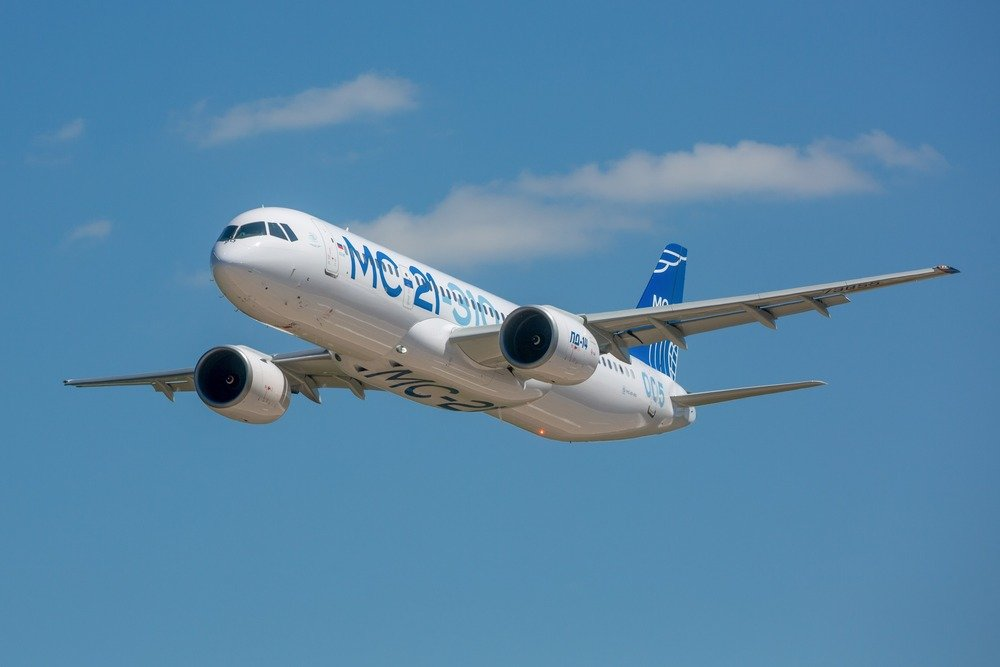

In [4]:
# Просмотр тестового изображения

from PIL import Image                                    

# Путь к файлу изображения
test_path = 'test_images/1.jpg'  
img = Image.open(test_path)

# Вывод изображения на экран 
display(img)   

In [15]:
segment_file = '''

from tensorflow.keras.models import load_model
MODEL_NAME =   'model_fmr_all.h5'
import numpy as np
from PIL import Image 
model = load_model(MODEL_NAME)                                              # Загрузка весов модели


def process(image_file):
    classes = {0: 'самолет',
               1: 'автомобиль',
               2: 'птица',
               3: 'кот',
               4: 'олень',
               5: 'собака',
               6: 'лягушка',
               7: 'лошадь',
               8: 'корабль',
               9: 'грузовик'}
    

    img_width, img_height = 32, 32

    img = Image.open(image_file).resize((img_height, img_width))
    image = np.array(img, dtype='float64') / 255

    image = np.expand_dims(image, axis=0)
    cls_image = np.argmax(model.predict(image))
    
    return classes[cls_image]
'''

with open('segment.py', 'w', encoding="utf-8") as file:
    file.write(segment_file)

In [16]:
# импорт модуля
import segment

Вызываем функцию `process()` из модуля `segment`, передав путь к изображению самолета

In [17]:
result = segment.process(r'test_images/5.jpg')
print(result)

олень


## Создание сервиса с демонстрационной формой

Приступим к созданию демонстрационной формы для выбранной модели. Все создаваемые файлы вместе составят установочный набор, на который будет ориентироваться хостинг при развертывании вашего сервиса.

Создадим файл приложения (формы):

In [18]:
app_file = '''

import streamlit as st
from PIL import Image 
from segment import process

st.title('AWS Cifar10')

image_file = st.file_uploader('Load an image', type=['png', 'jpg'])  # Добавление загрузчика файлов

if not image_file is None:                                           # Выполнение блока, если загружено изображение
    image = Image.open(image_file)                                   # Открытие изображения
    result = process(image_file)                                    # Обработка изображения с помощью функции, реализованной в другом файле
    st1.text(result)

'''

with open('app.py', 'w', encoding="utf-8") as file:
    file.write(app_file)

Создадим файл требований необходимых пакетов:

In [19]:
requirements_file = '''

streamlit==0.82.0
tensorflow-cpu==2.5.0

'''

with open('requirements.txt', 'w', encoding="utf-8") as file:
    file.write(requirements_file)

Удалим лишние файлы, находящиеся в текущей папке в Colab по умолчанию:

In [15]:
!rm -rf sample_data

Существует множество различных хостингов, позволяющих размещать свои сервисы и открывать доступ к ним по интернету. Однако многие из них ориентированы на размещение веб-сервисов и не всегда подходят для сервисов, емких в отношении вычислений.
Большинство хостингов предоставляют свои услуги на платной основе, но нам для учебных целей достаточно ограничиться и бесплатной платформой.

Варианты:

    - Amazon EC2 - сервис AWS (Amazon Web Services), позволяющий арендовать  виртуальный сервер для вычислений и/или хостинга приложений.
    - PythonAnywhere - облачная платформа для запуска приложений на Python.
    - Heroku - облачная PaaS-платформа (Platform as a Service), поддерживающая ряд языков программирования, в том числе Python.

В рамках данного занятия используем платформу **Heroku** как наиболее удобную и позволяющую быстро развернуть приложение.

## Регистрация аккаунта на **Heroku**

Пройдите регистрацию аккаунта на Heroku по данной [ссылке](https://signup.heroku.com/dc).<br>
Этот шаг можно пропустить, если у вас уже есть аккаунт.<br>
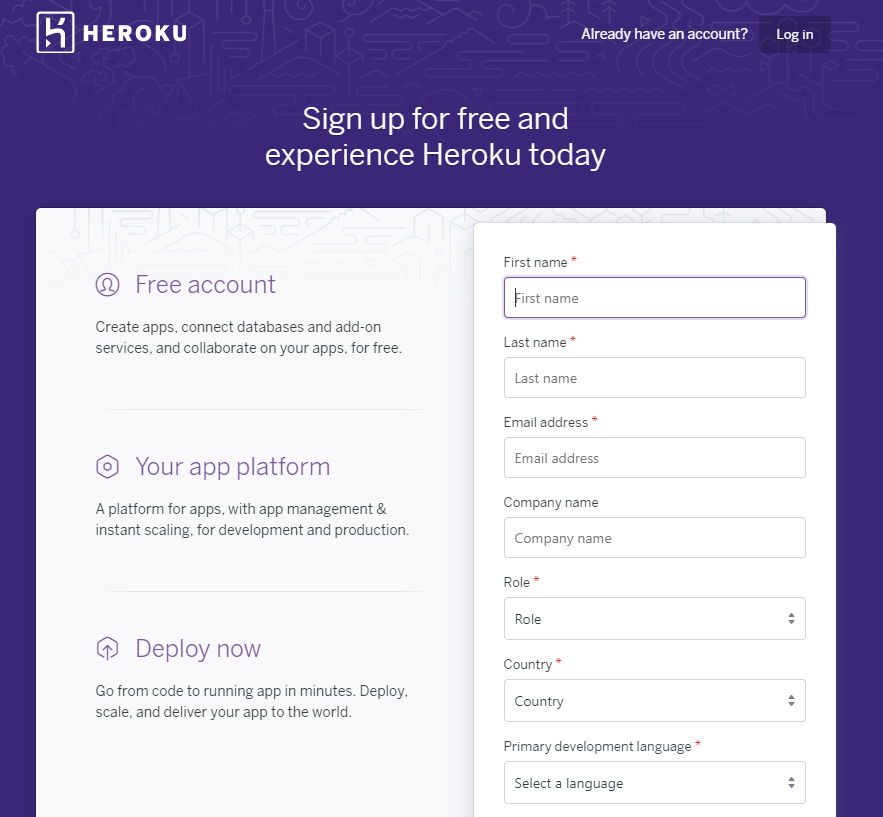

## Установка **Git** и **Heroku CLI**

Для развертывания сервиса в **Heroku** потребуется настроить и заполнить репозиторий **Git**.

**Git** - это система контроля версий для разработки на любых языках программирования. На данном занятии достаточно повторить показанные шаги; подробное изучение **Git** - тема отдельного курса.

Шаг с установкой **Git** можно пропустить, так как виртуальные машины Google Colab уже содержат предустановленный пакет **Git**.

Проверим наличие **Git**:

[Русскоязычная документация](https://git-scm.com/book/ru/v2) по Git

In [16]:
!git --version

git version 2.34.1.windows.1


Выполним начальную настройку **Git**: зададим имя пользователя и e-mail. Укажите свой email и имя-фамилию:

In [22]:
!git config --global user.email "gochualex@gmail.com"
!git config --global user.name "Kirgiz123!"

Установим инструменты командной строки **Heroku CLI** (Command Line Interface):

In [23]:
!curl https://cli-assets.heroku.com/install-ubuntu.sh | sh > /dev/null

The system cannot find the path specified.


Проверим правильность установки:


In [17]:
!heroku --version

heroku/7.53.0 win32-x64 node-v12.21.0


 Â»   Warning: heroku update available from 7.53.0 to 7.59.2.


Для авторизации в **Heroku** необходимо:

1. создать переменную **LOGIN** и поместить в нее ваш логин с **Heroku**;
2. создать переменную **API_KEY** и поместить в нее значение из поля **API Key** (перейти на [страницу с настройками Heroku](https://dashboard.heroku.com/account), прокрутить вниз).
3. создать файл **.netrc** в домашней папке с указанием логина и скопированного токена:

In [18]:
from pathlib import Path
home = str(Path.home())
print(home)

C:\Users\ne__r


In [19]:
LOGIN = 'gochualex@gmail.com'  # Укажите свой логин
API_KEY = '6d03107e-d235-40cc-b6d6-17521ad679e9'  # Укажите свой API-key
           
auth_file = '''machine api.heroku.com
  login {login}
  password {password}
machine git.heroku.com
  login {login}
  password {password}
'''.format(login=LOGIN, password=API_KEY)

with open(f'{home}\.netrc', 'w', encoding="utf-8") as file:
    file.write(auth_file)

## Отслеживание проекта в Git

Прежде чем вы сможете развернуть свое приложение в **Heroku**, вам необходимо инициализировать локальный репозиторий **Git** и зафиксировать в нем код вашего приложения:

In [32]:
!git init
!git add .
!git commit -m "My first commit"

Initialized empty Git repository in C:/UII/BaseCourse/Lesson15/.git/


The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


[master (root-commit) 861c5b1] My first commit
 30 files changed, 9228 insertions(+)
 create mode 100644 .ipynb_checkpoints/Practice1-Windows-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/Practice1-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/Practice2-checkpoint.ipynb
 create mode 100644 .netrc
 create mode 100644 Practice1-Windows.ipynb
 create mode 100644 Practice1.ipynb
 create mode 100644 Practice2.ipynb
 create mode 100644 Procfile
 create mode 100644 __pycache__/segment.cpython-37.pyc
 create mode 100644 app.py
 create mode 100644 helloworld.py
 create mode 100644 modelAir.h5
 create mode 100644 ngrok
 create mode 100644 ngrok-stable-linux-amd64.zip
 create mode 100644 requirements.txt
 create mode 100644 segment.py
 create mode 100644 setup.sh
 create mode 100644 test_images.zip
 create mode 100644 test_images/1.jpg
 create mode 100644 test_images/10.jpg
 create mode 100644 test_images/2.jpg
 create mode 100644 test_images/3.jpg
 create mode 100644 test_ima

Код вашего приложения теперь отслеживается в локальном репозитории **Git**. Он еще не отправлен на сервер **Heroku**.

## Создание удаленного репозитория **Heroku**

Git remotes - это версии вашего репозитория, которые находятся на других серверах. Вы развертываете свое приложение, отправляя его код на специальный удаленный сервер **Heroku**, связанный с вашим приложением.

Команда `heroku create` создает новое пустое приложение на **Heroku** вместе с соответствующим репозиторием **Git**. Если вы запустите эту команду из корневой папки вашего приложения, пустой репозиторий **Heroku Git** автоматически станет удаленным для вашего локального репозитория.

In [1]:
!heroku create

https://rocky-gorge-13406.herokuapp.com/ | https://git.heroku.com/rocky-gorge-13406.git


 Â»   Warning: heroku update available from 7.53.0 to 7.59.2.
Creating app... done, rocky-gorge-13406


Вы можете использовать команду `git remote`, чтобы проверить, что для вашего приложения установлен удаленный репозиторий с именем **heroku**:

In [2]:
!git remote -v

heroku	https://git.heroku.com/rocky-gorge-13406.git (fetch)
heroku	https://git.heroku.com/rocky-gorge-13406.git (push)


## Развертывание кода

Чтобы развернуть приложение в Heroku, нужно использовать команду `git push`, которая отправит код из локального репозитория на удаленный сервер **heroku**:

In [3]:
!git push heroku master

remote: Compressing source files... done.        
remote: Building source:        
remote: 
remote: -----> Building on the Heroku-20 stack        
remote: -----> Determining which buildpack to use for this app        
remote: -----> Python app detected        
remote: -----> No Python version was specified. Using the buildpack default: python-3.9.9        
remote:        To use a different version, see: https://devcenter.heroku.com/articles/python-runtimes        
remote: -----> Installing python-3.9.9        
remote: -----> Installing pip 21.3.1, setuptools 57.5.0 and wheel 0.37.0        
remote: -----> Installing SQLite3        
remote: -----> Installing requirements with pip        
remote:        Collecting streamlit==0.82.0        
remote:          Downloading streamlit-0.82.0-py2.py3-none-any.whl (8.2 MB)        
remote:        Collecting tensorflow-cpu==2.5.0        
remote:          Downloading tensorflow_cpu-2.5.0-cp39-cp39-manylinux2010_x86_64.whl (168.4 MB)        
remote:  

remote:        Collecting certifi>=2017.4.17        
remote:          Downloading certifi-2021.10.8-py2.py3-none-any.whl (149 kB)        
remote:        Collecting gitdb<5,>=4.0.1        
remote:          Downloading gitdb-4.0.9-py3-none-any.whl (63 kB)        
remote:        Collecting pyparsing!=3.0.5,>=2.0.2        
remote:          Downloading pyparsing-3.0.6-py3-none-any.whl (97 kB)        
remote:        Collecting pytz-deprecation-shim        
remote:          Downloading pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)        
remote:        Collecting decorator>=3.4.0        
remote:          Downloading decorator-5.1.0-py3-none-any.whl (9.1 kB)        
remote:        Collecting smmap<6,>=3.0.1        
remote:          Downloading smmap-5.0.0-py3-none-any.whl (24 kB)        
remote:        Collecting pyasn1-modules>=0.2.1        
remote:          Downloading pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)        
remote:        Collecting cachetools>=4.0      

Используйте эту же команду всякий раз, когда хотите развернуть в **Heroku** последнюю зафиксированную в репозитории версию вашего кода.

---

Обратите внимание, что **Heroku** развертывает только тот код, который вы отправляете в ветке **master** или **main**. Перенос кода в другую ветку удаленного репозитория **Heroku** не даст никакого эффекта.

---

## Проверка результа

В конце вывода ячейки с выполненой командой `git push heroku master` находится адрес страницы с демонстрационной формой.

Переходим по этой странице:<br>
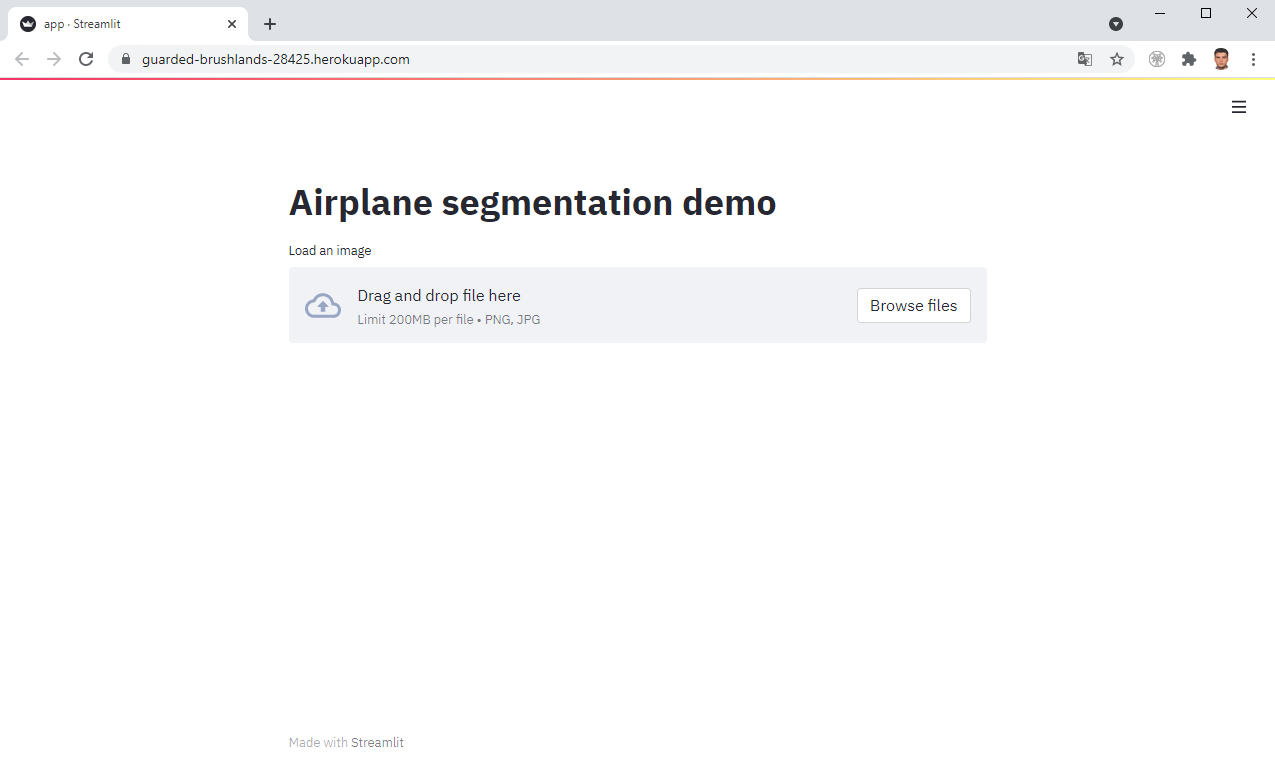

Загружаем изображение с самолетом и получаем следующий результат:



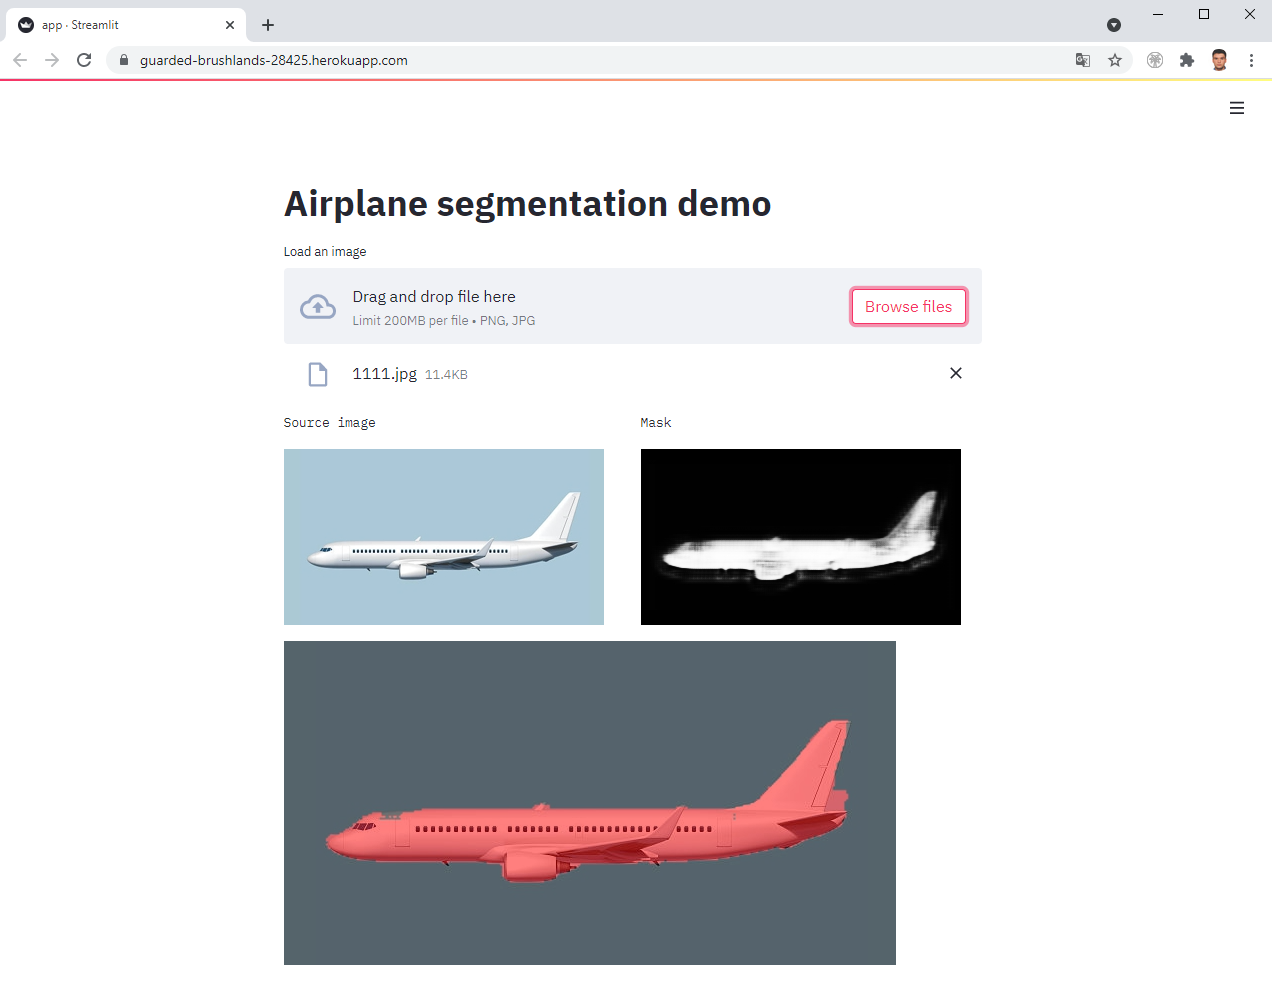

Примите поздравления!

Вы только что создали и разместили свою собственную модель нейросети в виде сервиса в интернете!

**Использованные материалы:**


In [ ]:
# https://proglib.io/p/sozdanie-interaktivnyh-paneley-s-streamlit-i-python-2021-06-21

# https://medium.com/nuances-of-programming/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%B0%D1%8F-%D1%81%D0%B1%D0%BE%D1%80%D0%BA%D0%B0-%D0%B8-%D1%80%D0%B0%D0%B7%D0%B2%D0%B5%D1%80%D1%82%D1%8B%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5-%D0%B4%D0%B0%D1%88%D0%B1%D0%BE%D1%80%D0%B4%D0%B0-%D1%81%D0%BE-streamlit-4b668ef25dc2

# https://blog.skillfactory.ru/kak-napisat-veb-prilozhenie-dlya-demonstratsii-data-science-proekta-na-python/

# https://habr.com/ru/post/568836/

# https://habr.com/ru/post/473196/

**Содержание**:

1. [Библиотека streamlit](https://colab.research.google.com/drive/1PzZMX_833gb1R1VgiuLBjlHs8s5cpmXL?usp=sharing)
2. Создание веб-сервера